Neural networks where all adjacent layers are fully connected are called multilayer
perceptrons (MLPs

Supervised learning is a type of machine learning algorithm in which the com‐
puter is trained on a labeled dataset. In other words, the dataset used for training
includes input data with corresponding output labels. The goal of the algorithm is to
learn a mapping between the input data and the output labels, so that it can make
predictions on new, unseen data.

We also need to change the integer labeling of the images to one-hot encoded vectors,
because the neural network output will be a probability that the image belongs to
each class. If the class integer label of an image is i, then its one-hot encoding is a
vector of length 10 (the number of classes) that has 0s in all but the ith element,
which is 1

In [1]:
import numpy as np
from tensorflow.keras import datasets, utils
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [2]:
NUM_CLASSES = 10
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_test = utils.to_categorical(y_test, NUM_CLASSES)

The green channel (1) value of the pixel in the (12,13) position of image 54

In [3]:
x_train[54, 12, 13, 1]

0.36862746

In [4]:
from tensorflow.keras import layers, models
input_layer = layers.Input(shape=(32, 32, 3))
x = layers.Flatten()(input_layer)
x = layers.Dense(units=200, activation = 'relu')(x)
x = layers.Dense(units=150, activation = 'relu')(x)
output_layer = layers.Dense(units=10, activation = 'softmax')(x)
model = models.Model(input_layer, output_layer)


In [5]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 200)               614600    
                                                                 
 dense_1 (Dense)             (None, 150)               30150     
                                                                 
 dense_2 (Dense)             (None, 10)                1510      
                                                                 
Total params: 646260 (2.47 MB)
Trainable params: 646260 (2.47 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Next we flatten this input into a vector, using a Flatten layer. This results in a vector
of length 3,072 (= 32 × 32 × 3). The reason we do this is because the subsequent
Dense layer requires that its input is flat, rather than a multidimensional array. As we
shall see later, other layer types require multidimensional arrays as input, so you need
to be aware of the required input and output shape of each layer type to understand
when it is necessary to use Flatten

The out‐
put from a given unit is the weighted sum of the inputs it receives from the previous
layer, which is then passed through a nonlinear activation function before being sent
to the following layer. The activation function is critical to ensure the neural network
is able to learn complex functions and doesn’t just output a linear combination of its
inputs.

Notice how the shape of our Input layer matches the shape of x_train and the shape
of our Dense output layer matches the shape of y_train. Keras uses None as a marker
for the first dimension to show that it doesn’t yet know the number of observations
that will be passed into the network.

Make sure you understand how the number of parameters is calcu‐
lated in each layer! It’s important to remember that by default, each
unit within a given layer is also connected to one additional bias
unit that always outputs 1. This ensures that the output from the
unit can still be nonzero even when all inputs from the previous
layer are 0.


Therefore, the number of parameters in the 200-unit Dense layer is
200 * (3,072 + 1) = 614,600.

In [6]:
from tensorflow.keras import optimizers
opt = optimizers.Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt,
 metrics=['accuracy'])

The optimizer is the algorithm that will be used to update the weights in the neural
network based on the gradient of the loss function.

In [8]:
model.fit(x_train
 , y_train
 , batch_size = 32
 , epochs = 10
 , shuffle = True
 )

Epoch 1/10
1563/1563 [==============================] - 20s 11ms/step - loss: 1.8474 - accuracy: 0.3363
Epoch 2/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.6699 - accuracy: 0.4051
Epoch 3/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.5945 - accuracy: 0.4312
Epoch 4/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.5345 - accuracy: 0.4528
Epoch 5/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.4949 - accuracy: 0.4657
Epoch 6/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.4601 - accuracy: 0.4794
Epoch 7/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.4355 - accuracy: 0.4870
Epoch 8/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.4162 - accuracy: 0.4952
Epoch 9/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.3937 - accuracy: 0.5030
Epoch 10/10
1563/1563 [==============================] - 18s 12m

 The training process works as follows.


First, the weights of the network are initialized to small random values. Then the net‐
work performs a series of training steps. At each training step, one batch of images is
passed through the network and the errors are backpropagated to update the weights.
The batch_size determines how many images are in each training step batch. The
larger the batch size, the more stable the gradient calculation, but the slower each
training step.


This continues until all observations in the dataset have been seen once. This completes the first epoch. The data is then passed through the network again in batches as
part of the second epoch. This process repeats until the specified number of epochs
have elapsed.

It would be far too time-consuming and computationally intensive
to use the entire dataset to calculate the gradient at each training
step, so generally a batch size between 32 and 256 is used. It is also
now recommended practice to increase the batch size as training
progresses.

We can see that the training dataset has been split into 1,563 batches (each containing
32 images) and it has been shown to the network 10 times (i.e., over 10 epochs), at a
rate of approximately 2 milliseconds per batch. The categorical cross-entropy loss has
fallen from 1.8377 to 1.3696, resulting in an accuracy increase from 33.69% after the
first epoch to 51.67% after the tenth epoch.

In [9]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.4296 - accuracy: 0.4977


[1.4296008348464966, 0.4977000057697296]

The output is a list of the metrics we are monitoring: categorical cross-entropy and
accuracy

In [10]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog'
 , 'frog', 'horse', 'ship', 'truck'])
preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

313/313 [==============================] - 1s 3ms/step


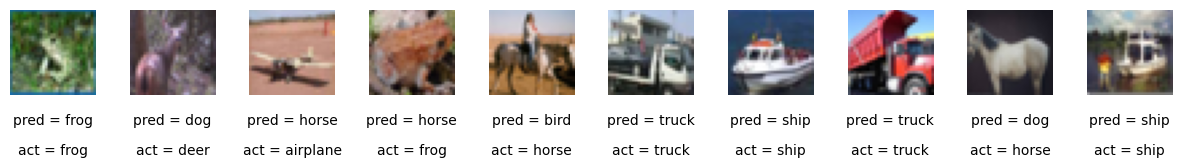

In [11]:
import matplotlib.pyplot as plt
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)
fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, idx in enumerate(indices):
 img = x_test[idx]
 ax = fig.add_subplot(1, n_to_show, i+1)
 ax.axis('off')
 ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10
 , ha='center', transform=ax.transAxes)
 ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10
 , ha='center', transform=ax.transAxes)
 ax.imshow(img)

One of the reasons our network isn’t yet performing as well as it might is because
there isn’t anything in the network that takes into account the spatial structure of the
input images

# Using CNN

The convolution is performed by multiplying
the filter pixelwise with the portion of the image, and summing the results. The out‐
put is more positive when the portion of the image closely matches the filter and
more negative when the portion of the image is the inverse of the filter

If we move the filter across the entire image from left to right and top to bottom,
recording the convolutional output as we go, we obtain a new array that picks out a
particular feature of the input, depending on the values in the filter.

A convolutional layer is simply a collection of filters, where the values stored in the
filters are the weights that are learned by the neural network through training. Ini‐
tially these are random, but gradually the filters adapt their weights to start picking
out interesting features such as edges or particular color combinations.


In [7]:
input_layer = layers.Input(shape=(64,64,1))
conv_layer_1 = layers.Conv2D(
 filters = 2
 , kernel_size = (3,3)
 , strides = 1
 , padding = "same"
 )(input_layer)

The output of a Conv2D layer is another four-dimensional tensor, now of shape
(batch_size, height, width, filters),

In [8]:
from tensorflow.keras import layers, models
input_layer = layers.Input(shape=(32,32,3))
conv_layer_1 = layers.Conv2D(
 filters = 10
 , kernel_size = (4,4)
 , strides = 2
 , padding = 'same'
 )(input_layer)
conv_layer_2 = layers.Conv2D(
 filters = 20
 , kernel_size = (3,3)
 , strides = 2
 , padding = 'same'
 )(conv_layer_1)
flatten_layer = layers.Flatten()(conv_layer_2)
output_layer = layers.Dense(units=10, activation = 'softmax')(flatten_layer)
model = models.Model(input_layer, output_layer)


In general, the depth of the filters in a layer is always equal to the
number of channels output by the preceding layer.


In [9]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 10)        490       
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 20)          1820      
                                                                 
 flatten_1 (Flatten)         (None, 1280)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                12810     
                                                                 
Total params: 15120 (59.06 KB)
Trainable params: 15120 (59.06 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


1. The input shape is (None, 32, 32, 3)—Keras uses None to represent the fact
that we can pass any number of images through the network simultaneously.
Since the network is just performing tensor algebra, we don’t need to pass images
through the network individually, but instead can pass them through together as
a batch.

2. The shape of each of the 10 filters in the first convolutional layer is 4 × 4 × 3. This
is because we have chosen each filter to have a height and width of 4 (ker
nel_size = (4,4)) and there are three channels in the preceding layer (red,
green, and blue). Therefore, the number of parameters (or weights) in the layer is
(4 × 4 × 3 + 1) × 10 = 490, where the + 1 is due to the inclusion of a bias term
attached to each of the filters. The output from each filter will be the pixelwise
multiplication of the filter weights and the 4 × 4 × 3 section of the image it is covering. As strides = 2 and padding = "same", the width and height of the
output are both halved to 16, and since there are 10 filters the output of the first
layer is a batch of tensors each having shape [16, 16, 10].


3. In the second convolutional layer, we choose the filters to be 3 × 3 and they now
have depth 10, to match the number of channels in the previous layer. Since there
are 20 filters in this layer, this gives a total number of parameters (weights) of (3
× 3 × 10 + 1) × 20 = 1,820. Again, we use strides = 2 and padding = "same",
so the width and height both halve. This gives us an overall output shape of
(None, 8, 8, 20).


4. We now flatten the tensor using the Keras Flatten layer. This results in a set of 8
× 8 × 20 = 1,280 units. Note that there are no parameters to learn in a Flatten
layer as the operation is just a restructuring of the tensor.


5. We finally connect these units to a 10-unit Dense layer with softmax activation,
which represents the probability of each category in a 10-category classification
task. This creates an extra 1,280 × 10 = 12,810 parameters (weights) to learn.

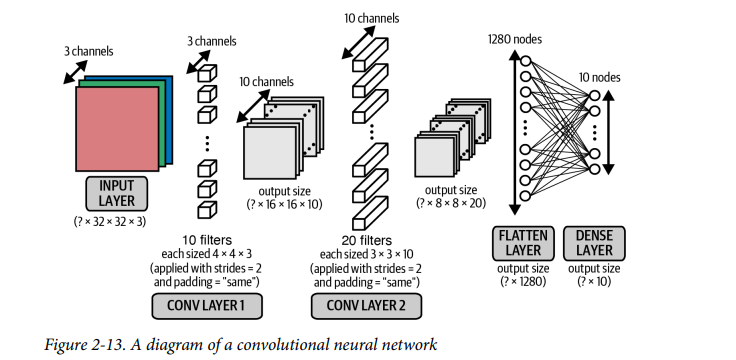

In [10]:
from tensorflow.keras import layers, models
input_layer = layers.Input((32,32,3))
x = layers.Conv2D(filters = 32, kernel_size = 3, strides = 1, padding = 'same')(input_layer)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(filters = 32, kernel_size = 3, strides = 2, padding = 'same')(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same')(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(filters = 64, kernel_size = 3, strides = 2, padding = 'same')(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)
x = layers.Flatten()(x)
x = layers.Dense(128)(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)
x = layers.Dropout(rate = 0.5)(x)
output_layer = layers.Dense(10, activation = 'softmax')(x)
model = models.Model(input_layer, output_layer)

How many parameters are contained within a batch normalization layer? For every
channel in the preceding layer, two weights need to be learned: the scale (gamma) and
shift (beta). These are the trainable parameters. The moving average and standard
deviation also need to be calculated for each channel, but since they are derived from
the data passing through the layer rather than trained through backpropagation, they
are called nontrainable parameters. In total, this gives four parameters for each chan‐
nel in the preceding layer, where two are trainable and two are nontrainable.

In [11]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 16, 16, 32)        128       
 chNormalization)                                          

The order in which to use the batch normalization and activation
layers is a matter of preference. Usually batch normalization layers
are placed before the activation, but some successful architectures
use these layers the other way around. If you do choose to use
batch normalization before activation, you can remember the order
using the acronym BAD (batch normalization, activation, then
dropout)!

In [12]:
opt = optimizers.Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt,
 metrics=['accuracy'])

In [13]:
model.fit(x_train
 , y_train
 , batch_size = 32
 , epochs = 10
 , shuffle = True
 )

Epoch 1/10
1563/1563 [==============================] - 20s 7ms/step - loss: 1.5237 - accuracy: 0.4658
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1183 - accuracy: 0.6068
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9837 - accuracy: 0.6562
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9035 - accuracy: 0.6862
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8423 - accuracy: 0.7052
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7980 - accuracy: 0.7198
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7523 - accuracy: 0.7371
Epoch 8/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7135 - accuracy: 0.7514
Epoch 9/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6787 - accuracy: 0.7628
Epoch 10/10
1563/1563 [==============================] - 11s 7ms/step - l

This improvement has been achieved simply by changing the architecture of the
model to include convolutional, batch normalization, and dropout layers. Notice that
the number of parameters is actually fewer in our new model than the previous
model, even though the number of layers is far greater. This demonstrates the impor‐
tance of being experimental with your model design and being comfortable with how
the different layer types can be used to your advantage. When building generative models, it becomes even more important to understand the inner workings of your
model since it is the middle layers of your network that capture the high-level fea‐
tures that you are most interested in.


In [14]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.8171 - accuracy: 0.7205


[0.8170681595802307, 0.7204999923706055]

In [15]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog'
 , 'frog', 'horse', 'ship', 'truck'])
preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

313/313 [==============================] - 1s 2ms/step


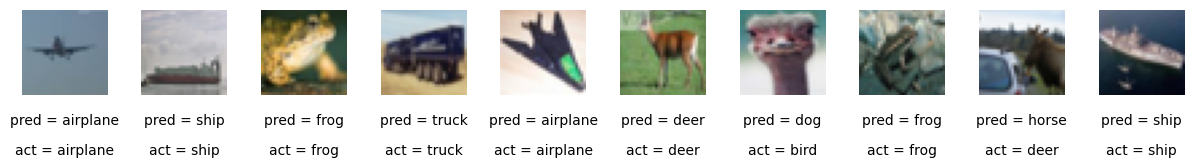

In [16]:
import matplotlib.pyplot as plt
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)
fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, idx in enumerate(indices):
 img = x_test[idx]
 ax = fig.add_subplot(1, n_to_show, i+1)
 ax.axis('off')
 ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10
 , ha='center', transform=ax.transAxes)
 ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10
 , ha='center', transform=ax.transAxes)
 ax.imshow(img)

 Deep neural networks
are completely flexible by design, and there really are no fixed rules when it comes to
model architecture. There are guidelines and best practices, but you should feel free
to experiment with layers and the order in which they appear. Don’t feel constrained
to only use the architectures that you have read about in this book or elsewhere! Like
a child with a set of building blocks, the design of your neural network is only limited
by your own imagination.
